# L1/L2 outputs
Exploratory data analysis: Compares the number and recipients of inputs from LMCs. Only L2 and L1 were found to have presynaptic terminals in the lamina. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import seaborn as sns
import itertools
from sklearn.linear_model import LinearRegression

from vis.hex_lattice import hexplot
from vis.fig_tools import linear_cmap, subtype_cm

In [3]:
tp = '200507'
lamina_links = pd.read_pickle(f'~/Data/{tp}_lamina/{tp}_linkdf.pickle')
subtypes = np.unique([*lamina_links["pre_type"], *lamina_links["post_type"]])

all_ctypes = [p for p in itertools.product(subtypes, subtypes)]  
all_ctype_labels = [f"{pre}->{post}" for pre, post in all_ctypes]
ommatidia = np.unique(lamina_links['pre_om'])

In [4]:
df_lamina = pd.DataFrame(index=ommatidia, columns=all_ctype_labels).astype('Int64')

for om, row in df_lamina.iterrows():
    for c in all_ctype_labels:
        pre_t, post_t = c.split('->')
        # Cartridges on the posterior edge lack L4, so their counts for these connections are NaNed 
        if om in ['B0', 'E4', 'E5', 'E6', 'E7', 'D2', 'C1'] and post_t == 'LMC_4':
            df_lamina.loc[om, c] = None
        else:
            df_lamina.loc[om, c] = sum((lamina_links.pre_om == om) & (lamina_links.post_om == om) & 
                                       (lamina_links.pre_type == pre_t) & (lamina_links.post_type == post_t))


# L1 outputs are sparse

In [5]:
display(df_lamina.filter(regex='UNKNOWN').sum(axis=0))

l1_out = df_lamina.filter(regex='^LMC_1->')
l1_out = l1_out[(l1_out.sum()>0).index]

l2_out = df_lamina.filter(regex='^LMC_2->')
l2_out = l2_out[(l2_out.sum()>0).index]

ln_out = df_lamina.filter(regex='^LMC_N->')
ln_out = ln_out[(ln_out.sum()>0).index]

LMC_1->UNKNOWN      0.0
LMC_2->UNKNOWN      0.0
LMC_3->UNKNOWN      0.0
LMC_4->UNKNOWN      0.0
LMC_N->UNKNOWN      0.0
R1R4->UNKNOWN       0.0
R2R5->UNKNOWN       0.0
R3R6->UNKNOWN       0.0
R7->UNKNOWN         0.0
R7p->UNKNOWN        0.0
R8->UNKNOWN         0.0
UNKNOWN->LMC_1      0.0
UNKNOWN->LMC_2      0.0
UNKNOWN->LMC_3      0.0
UNKNOWN->LMC_4      0.0
UNKNOWN->LMC_N      0.0
UNKNOWN->R1R4       0.0
UNKNOWN->R2R5       0.0
UNKNOWN->R3R6       0.0
UNKNOWN->R7         0.0
UNKNOWN->R7p        0.0
UNKNOWN->R8         0.0
UNKNOWN->UNKNOWN    0.0
UNKNOWN->centri     0.0
centri->UNKNOWN     0.0
dtype: float64

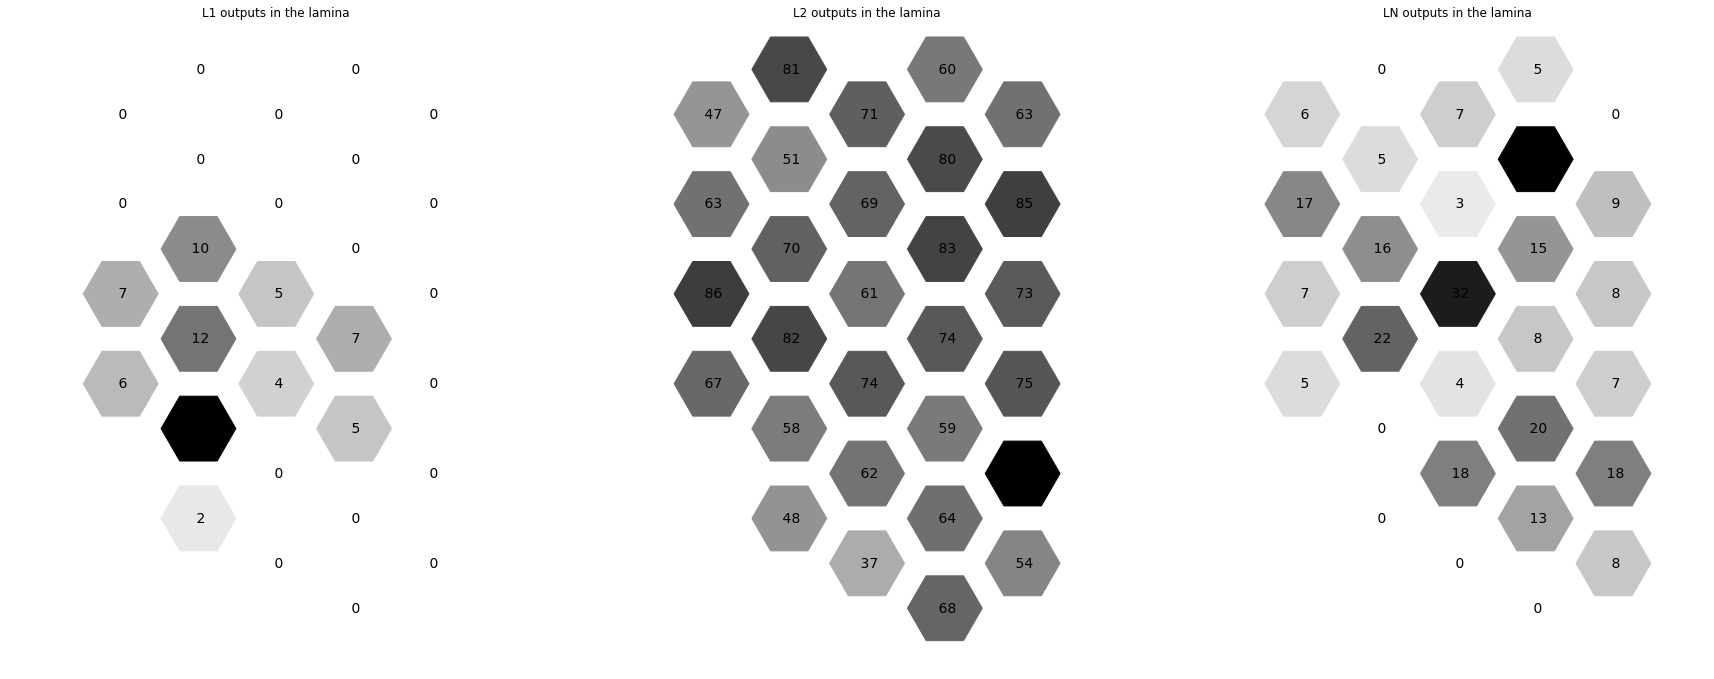

In [6]:
fig, ax = plt.subplots(1, 3, figsize=[30, 30])

cm = plt.cm.get_cmap('binary')
# L1 outputs
max_l1 = l1_out.sum(axis=1).max()
node_data = {o: {'colour': cm(l1_out.loc[o].sum()/max_l1),
                'label': f"{l1_out.loc[o].sum(): .0f}"
                } for o in ommatidia}
hexplot(node_data=node_data, ax=ax[0], scale_factor=0.1)
ax[0].set_title("L1 outputs in the lamina")
# L2 outputs 
max_l2 = l2_out.sum(axis=1).max()
node_data = {o: {'colour': cm(l2_out.loc[o].sum()/max_l2),
                'label': f"{l2_out.loc[o].sum(): .0f}"
                } for o in ommatidia}
hexplot(node_data=node_data, ax=ax[1], scale_factor=0.1)
ax[1].set_title("L2 outputs in the lamina")

max_ln = ln_out.sum(axis=1).max()
node_data = {o: {'colour': cm(ln_out.loc[o].sum()/max_ln),
                'label': f"{ln_out.loc[o].sum(): .0f}"
                } for o in ommatidia}
hexplot(node_data=node_data, ax=ax[2], scale_factor=0.1)
ax[2].set_title("LN outputs in the lamina")
plt.show()